# 目標

## 機械学習の基礎を理解して、独自で基本的な学習モデルのコードを実装できるようになる。

# 学習内容

## - AIとは何か
## - 機械学習の基本原理とは
## - 機械学習を構成する要素
## - 機械学習モデルとは
## - TensorFlowとPythonによるautoencoderの実装
## - 画像分類技術の基礎
## - TensorFlowとPythonによる画像分類の実装
## - スパムメール分類
## - 強化学習の基礎
## - 迷路探索アルゴリズムの実装(各自)
## - 生成AIの使い方（プロンプト）

## 単純パーセプトロン　

### 入門

#### パーセプトロンの定義：生物学的着想から人工ニューロンへ

パーセプトロンは、ニューラルネットワークの分野における最も基本的なアルゴリズムであり、その起源は生物の神経細胞（ニューロン）の信号処理メカニズムにあります 。ニューロンは、他のニューロンから信号を受け取り（樹状突起）、それを細胞体で処理し、信号の強さが特定の閾値を超えると次のニューロンへ信号を出力（軸索発火）します 。パーセプトロンは、この生物学的なプロセスを数学的に模倣したモデルです 。   

具体的には、「人工ニューロン」とも呼ばれる単純パーセプトロンは、複数の二値（0か1）の入力を受け取り、それらに基づいて単一の二値（0か1）の出力を生成する非常にシンプルな計算ユニットです 。これはあくまで生物学的ニューロンの機能を大幅に簡略化したモデルである点に注意が必要です 。   

#### 歴史的背景と意義（フランク・ローゼンブラット）

パーセプトロンは、1957年から1958年にかけて、アメリカの心理学者フランク・ローゼンブラットによって考案されました 。これはニューラルネットワーク研究の原点と見なされており 、後のディープラーニング技術の先駆けとなる重要な概念でした 。発表当初は大きな期待を集めましたが、後にマービン・ミンスキーとシーモア・パパートによってその限界（特にXOR問題のような線形分離不可能な問題を解けないこと）が指摘され、これが第一次AIブームの終焉、いわゆる「AIの冬」の一因となったとも言われています 。   

#### ニューラルネットワークの礎石としてのパーセプトロン

「単純パーセプトロン」とは、通常、単一の計算ユニットを指します。これは、より複雑なネットワーク構造を理解するための基本的な構成要素（ビルディングブロック）です 。単純パーセプトロンの仕組みを理解することは、多層パーセプトロン（MLP）やディープラーニングといった、より高度なモデルを学ぶ上で不可欠です 。   

なお、「パーセプトロン」という用語は、文脈によってこの単純なモデル（単層）を指す場合と、複数のパーセプトロンを組み合わせた多層構造を指す場合と、複数のパーセプトロンを組み合わせた多層構造を指す場合があります 。本レポートでは、主に「単純パーセプトロン」に焦点を当てて解説を進めます。   

### 構造

#### アーキテクチャ概要：入力層と出力層

単純パーセプトロンは、非常に基本的な二層構造を持っています。信号を受け取る「入力層」と、単一の結果を出力する「出力層」のみで構成されます 。多層パーセプトロン（MLP）との大きな違いは、入力層と出力層の間に「中間層（隠れ層）」が存在しない点です 。   

![Perceptron](./perceptron.png)

#### 主要な構成要素

単純パーセプトロンは、以下の要素から成り立っています。

- 入力 (Input, 特徴量, x): パーセプトロンに与えられるデータの特徴を表す信号です。通常、複数の入力 $(x_1,x_2, ..... , x_n)$を受け取ります 。   
- 重み (Weight, シナプス強度, w): 各入力信号 $x_i$ に関連付けられた数値であり、その入力が出力に与える影響の大きさ、すなわち重要度を示します 。どの入力がより重要かを制御するパラメータであり $(w_1, w_2, ..... , w_n)$ 、学習プロセスを通じてこれらの重みが調整されます 。   
- バイアス (Bias, b) / 閾値 (Threshold, θ):
   - 閾値 (θ): パーセプトロンが「発火」（出力を1とする）するために、入力の重み付き和が超えるべき境界値です 。ニューロンの発火のしやすさを制御します 。   
   - バイアス (b): 閾値と同様の役割を果たすパラメータで、数式上は b=−θ の関係にあります 。バイアスは、決定境界の位置を平行移動させる効果を持ち、活性化の閾値を調整します 。実装上は、常に+1の値を持つ追加の入力 $x_0$に対応する重み$w_0$として扱われることがよくあります 。   
- 活性化関数 (Activation Function, ステップ関数): 最終的な出力を決定する関数です。単純パーセプトロンでは、通常「ステップ関数」（ヘヴィサイド関数）が用いられます 。これは、入力の総和（重み付き和＋バイアス）がある基準値（バイアスを用いる場合は通常0）を超えた場合に1を、それ以外の場合に0（または-1 ）を出力します。   

$$  \begin{equation*}
    y = 
   \left\{
      \begin{align*}
         0 \quad ( w_1x_1 + w_2x_2 \leq \theta ) \\
         1 \quad ( w_1x_1 + w_2x_2 \gt \theta  ) 
      \end{align*}
   \right.
\end{equation*}
$$

#### バイアスと閾値の等価性と実装上の利点
概念的には、閾値は比較対象の値、バイアスは加算される項として区別されますが、両者はニューロンの発火しやすさを制御するという同じ目的を果たします。閾値$ \theta $を負のバイアス $ b= − \theta $ として扱うことで、ニューロンへの総入力（ネット入力）の計算式を、単純な内積とバイアスの和$ z = w \cdot x + b $ で表現できます。さらに、バイアスを固定入力$ x_0 = 1 $ に対応する重み$ w_0 $​ と見なせば、$ z = w^{\prime} \cdot x^{}\prime $ （ここで $ x^{\prime}= [1,x_1​,…,x_n​]、w′ = [b,w_1​,…,w_n​]）$のように、単一の内積計算として統一的に扱えます。この表現は、特に学習アルゴリズムを実装する際に計算を簡略化し、便利です。この表記法の変遷は、数学的・実装的な利便性を追求した結果と言えるでしょう。

##### 生物学的ニューロンとパーセプトロンの構成要素比較

パーセプトロンの概念は生物学的ニューロンから着想を得ているため 1、両者の構成要素を対比することで、そのモデル化の意図を理解しやすくなります。以下の表は、その対応関係を示しています。

| 生物学的ニューロンの要素 | 単純パーセプトロンの要素 | 説明　|
| ----- | ---- | ---- |
| 樹状突起 (Dendrites) | 入力 $(x_1​,…,x_n​)$ | 他のニューロンからの信号を受け取る部分 |
| シナプス (Synapses) | 重み $(w_1​,…,w_n​)$ |  信号の伝達効率（結合強度）を調整する部分 |
| 細胞体 (Cell Body) | 活性化関数/閾値 ($ \theta $ または $b$) | 信号の強さが一定値を超えたか判断し、発火を決定する部分 |
| 軸索 (Axon) | 出力 ($y$) |  処理結果の信号を次のニューロンへ伝達する部分 | 

この対比により、抽象的な数学モデルが、生物学的なインスピレーションに基づいていることが明確になり、初心者にとってもパーセプトロンの概念がより直感的に捉えやすくなるでしょう。

### 動作メカニズム

#### ネット入力の計算：重み付き和

パーセプトロンの計算の第一段階は、各入力$x_i$​に対応する重み$w_i$​を掛け合わせ、それらの積を合計することです。
次に、この重み付き和にバイアス項$b$を加えます。これにより、ネット入力$z$が計算されます。
 $$ z = \sum_{i=1}^n ​w_i​x_i​+ b $$
閾値$\theta$を用いる場合は、バイアスを加えず、重み付き和
$$ Sum = \sum_{i=1}^n ​w_i​x_i​ $$ 
を計算します。

#### 決定境界：閾値処理ロジック

計算の第二段階は、計算されたネット入力$z$ または重み付き和 Sum）に対して活性化関数（ステップ関数）を適用することです 。
バイアス$b$を用いる場合、ネット入力$z$が0より大きければ1を、そうでなければ0（または-1）を出力します。 
閾値$\theta$を用いる場合、重み付き和Sumが$\theta$以上であれば1を、そうでなければ0を出力します。

#### パーセプトロン出力の数式表現
以上の計算は、ベクトル表記を用いるとより簡潔に表現できます。入力ベクトルを $x=[x_1​,…,x_n​]$、重みベクトルを$w=[w_1​,…,w_n​]$ とすると、パーセプトロンの出力 y は次のように書けます。
$$
 y=step(w \cdot x + b)
$$
ここで、step(⋅) はステップ関数を表します。

![Step関数](./step_function.png)

#### 幾何学的解釈：線形分離器としてのパーセプトロン
ネット入力の計算式 $z=w \cdot x+b$ は、線形方程式です。この式で z=0 となる条件 $w \cdot x + b = 0$ は、入力空間 ($x$ が存在する空間) において、直線（2次元の場合）、平面（3次元の場合）、あるいは超平面（より高次元の場合）を定義します。パーセプトロンの出力は、入力点$x$がこの超平面のどちら側にあるかを示しているに過ぎません。つまり、単純パーセプトロンは本質的に、入力空間を一つの超平面で二つの領域に分割する「線形分離器」として機能します。この幾何学的な視点は、パーセプトロンがなぜ線形分離可能な問題しか解けないのかを理解する上で極めて重要です 。


### 適切な重みの学習：パーセプトロン学習規則

#### 基本的な考え方：間違いからの学習（誤り訂正）
パーセプトロンの学習の目的は、与えられた入力 x に対して正しい出力 t （教師ラベル）を生成するように、重み w とバイアス b を見つけ出すことです 11。この学習は、ラベル付きの訓練データを用いて行われます。
パーセプトロン学習規則は、「誤り訂正型」のアルゴリズムです。つまり、パーセプトロンが訓練データに対して誤った出力（予測 y が教師ラベル t と異なる）をした場合にのみ、重みとバイアスが調整されます。

#### パーセプトロン学習アルゴリズム

学習プロセスは、以下の手順で進められます。   

1. 初期化: 重み $w_i$​ とバイアス $b$ を、小さなランダム値またはゼロで初期化します。    
2. 訓練データの反復: 各訓練サンプル (x, 教師ラベル t) について、以下の処理を行います。    
    a. 予測: 現在の重みとバイアスを用いて、パーセプトロンの出力$y=step(w \cdot x+b)$ を計算します。   
    b. 誤り判定と更新: もし予測 y が教師ラベル t と異なる場合$（y \ne t）$、重みとバイアスを更新します。     
3. 終了条件: 全ての訓練データに対して誤りがなくなるまで（すなわち、全ての訓練サンプルを正しく分類できるようになるまで）、ステップ2をデータセット全体に対して繰り返します（この1回の繰り返しを1エポックと呼びます）。あるいは、事前に定められた最大エポック数に達したら学習を終了します 。

#### 重みとバイアスの更新規則（数式）
予測が誤っていた場合の更新規則は、以下の式で与えられます。

$$
\begin{aligned}
  w_i &​= w_i​ + \eta (t−y) x_i​    \\
  b   &= b + \eta (t−y)  
\end{aligned}
$$

ここで、
- $\eta$ (イータ) は学習率（learning rate）と呼ばれる正の定数です。
- $(t−y)$ は誤差項です。教師ラベル$t$と予測$y$が {0, 1} または {-1, +1} の場合、この値はそれぞれ ±1 または ±2 になります（実装に応じてスケーリングが必要な場合があります）。
- $x_i$​は、更新対象の重み $w_i$​に対応する入力値です。 バイアスの更新式は、バイアスを$x_0​ = 1$ に対応する重み$w_0$​と考えれば、重みの更新式と同じ形になります。

この更新規則は、パーセプトロン損失関数$L=max(0,−t \cdot z)$ ここで$z = w \cdot x + b、 t \in \{−1,1\}$に対する勾配降下法を、誤分類された単一の点について適用したものと解釈できます。

#### 学習率 ( $ \eta $) の役割

学習率$ \eta $は、重みの更新量を制御する重要なハイパーパラメータ（学習前に人間が設定するパラメータ）です。
- $ \eta $が小さい場合：学習は安定しますが、収束に必要な反復回数（エポック数）が増え、学習に時間がかかる可能性があります。
- $ \eta $が大きい場合：学習が速く進む可能性がありますが、更新量が大きすぎるために最適解を行き過ぎてしまい、重みが発散したり、収束せずに振動したりするリスクがあります。
適切な学習率を選択することは、学習の成功に不可欠です。

#### パーセプトロン収束定理

パーセプトロン学習規則には、強力な理論的保証があります。パーセプトロン収束定理によれば、もし訓練データセットが線形分離可能であるならば、パーセプトロン学習アルゴリズムは有限回の更新で、全ての訓練データを正しく分類する重みベクトル（とバイアス）を見つけることが保証されています。
しかし、この定理が成り立つための絶対条件は、データが線形分離可能であることです。

#### オンライン学習とその特性
パーセプトロン学習規則は、訓練サンプルを一つずつ見て、誤りがあればその都度重みを更新します。これは「オンライン学習」と呼ばれる方式で、データセット全体を処理してから更新を行う「バッチ学習」（例：標準的な勾配降下法）とは対照的です 4。オンライン学習は、データの提示順序によって学習の経路が変わる可能性がありますが、線形分離可能なデータに対する収束保証は維持されます。この逐次的な更新は、メモリ効率が良いという利点がある一方で、更新が不安定になる可能性も秘めています。

#### 非分離データへの対応
収束定理の裏返しとして、もしデータが線形分離不可能な場合、パーセプトロン学習アルゴリズムは収束する保証がありません 11。重みは安定せず、無限に更新を繰り返したり、振動したりする可能性があります 11。重要なのは、線形分離不可能な場合に、単に収束しないだけでなく、「最もよくデータを分離する線（最適近似線）」のような次善の解を見つけるメカニズムも持たない点です。これは、他の線形分類器（例：ロジスティック回帰）が損失関数を最小化することで何らかの解を見つけようとするのとは対照的です。この「失敗時の挙動」が、実用上の大きな制約となります。


### Python実装

#### 論理ゲートの実装（AND, OR, NAND）
まず、単純パーセプトロンの構造を用いて、基本的な論理ゲート（AND, OR, NAND）を実装する例を見てみましょう。ここでは、学習アルゴリズムを使わず、ゲートの真理値表を満たすように手動で設定した重みとバイアスを使用します。

```Python
def step_function(z):
  """ステップ関数"""
  return 1 if z >= 0 else 0 # 閾値を0とする

def AND(x1, x2):
  """ANDゲート（手動設定）"""
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5]) # 重み
  b = -0.7                 # バイアス
  z = np.dot(w, x) + b
  return step_function(z)

def OR(x1, x2):
  """ORゲート（手動設定）"""
  x = np.array([x1, x2])
  w = np.array([0.7, 0.7]) # 重み (ANDとは異なる)
  b = -0.3                 # バイアス (ANDとは異なる)
  z = np.dot(w, x) + b
  return step_function(z)

def NAND(x1, x2):
  """NANDゲート（手動設定）"""
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5]) # 重み (ANDの符号反転)
  b = 0.7                   # バイアス (ANDの符号反転)
z = np.dot(w, x) + b
  return step_function(z)

# 動作確認
print("AND(0, 0):", AND(0, 0)) # 0
print("AND(1, 1):", AND(1, 1)) # 1
print("OR(0, 0):", OR(0, 0))   # 0
print("OR(0, 1):", OR(0, 1))   # 1
print("NAND(1, 1):", NAND(1, 1)) # 0
print("NAND(0, 1):", NAND(0, 1)) # 1

```

この例では、各ゲートに対して適切な重みとバイアスを設定することで、正しい論理演算が実現できることを示しています。

#### データ反復（エポック）と重み更新

次に、パーセプトロン学習規則を実装し、データから自動的に重みとバイアスを学習するプロセスを見ていきます。これには、訓練データを繰り返し処理するループ（エポック）と、誤りがあった場合に重みとバイアスを更新するロジックが含まれます。

このコードは、パーセプトロンモデルを定義し、ANDゲートの真理値表データを使って学習させ、学習によって得られた重みを用いて予測を行う一連の流れを示しています 30。

In [ ]:
# パーセプトロンでAND回路を作る
# AND回路とは
#    x1  x2  y
#    0   0   0
#    0   1   0
#    1   0   0
#    1   1   1 
#  w1, w2, θ　は？　
# w1 = 0.5, w2 = 0.5, θ = 0.7  0.5 * 1 + 0.5 * 1 = 1 > 0.7

"""
  OR
  x1  x2 y
  0   0  0
  1   0  1
  0   1  1  
  1   1  1
  
  NAND
  x1  x2  y
  0   0   1
  1   0   1
  0   1   1
  1   1   0 
 
 ORとNANDのw1, w2, θは？
  
"""

import numpy as np

def AND(x1, x2):
    w1 = 0.5
    w2 = 0.5
    theta = 0.7
    y = w1 * x1 + w2 * x2
    if y > theta:
        return 1
    else:
        return 0

def OR(x1, x2):
    w1 = 0.5
    w2 = 0.5
    theta = 0.0
    y = w1 * x1 + w2 * x2
    if y > theta:
        return 1
    else:
        return 0

def AND_B(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR_B(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.0
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

#AND_B(0, 0)
#AND_B(0, 1)
#AND_B(1, 0)
#AND_B(1, 1)
OR(1, 0)
OR(0, 1)
OR(1, 1)
OR_B(0, 0)
OR_B(1, 0)
OR_B(0, 1)
OR_B(1, 1)

In [ ]:
"""単純パーセプトロンの実装"""

class SimplePerceptron:
    def __init__(self, learning_rate=0.1, n_iter=50, random_state=1):
        """
        単純パーセプトロンの初期化

        Parameters:
        learning_rate (float): 学習率 (0.0より大きく1.0以下)
        n_iter (int): 訓練データの反復回数（エポック数）
        random_state (int): 重み初期化のための乱数シード
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        self.weights = None # 重みベクトル (バイアス項含む)
        self.errors_ = []    # 各エポックでの誤分類数

    def fit(self, X, t):
        """
        訓練データを用いてパーセプトロンの重みを学習

        Parameters:
        X (array-like, shape = [n_samples, n_features]): 訓練データ
        t (array-like, shape = [n_samples]): 教師ラベル (1 or 0)
        """
        rgen = np.random.RandomState(self.random_state)
        # 重みを小さな乱数で初期化 (+1はバイアス項のため)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        # 教師ラベルを内部的に -1, 1 に変換 (更新式のため)
        t_internal = np.where(t == 1, 1, -1)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, t_internal):
                #print("target =", target)
                # 予測 (ネット入力計算 -> 活性化)
                net_input = self.net_input(xi)

                # 活性化関数 (ここでは符号関数に近い役割)
                y = np.where(net_input >= 0.0, 1, -1)
                # 誤りがあれば重みを更新
                if y != target:
                    update = self.learning_rate * (target - y)
                    self.weights[1:] += update * xi
                    self.weights += update # バイアス項の更新 (入力x0=1とみなす)
                    errors += 1
                #print("weights =", self.weights)
            self.errors_.append(errors)
            # 全てのサンプルが正しく分類されたら学習終了 (オプション)
            # if errors == 0:
            #     break
        return self
    
    def net_input(self, X):
        """ネット入力（総入力）を計算"""
        # np.dot(X, self.weights[1:]) で重み付き和、+ self.weights でバイアス加算
        return np.sum(np.dot(X, self.weights[1:])) + self.weights[0]  # w1*x1 + w2*x2 * + b
  
    def predict(self, X):
        """入力データに対するクラスラベルを予測"""
        # ネット入力を計算し、ステップ関数（ここでは閾値0）でクラスラベルを決定
        #print("X = ", X)
        #print("self.weights = ", self.weights)
        return np.where(self.net_input(X) >= 0.0, 1, 0) # 出力は 1 or 0 に戻す


# ANDゲートの訓練データ
#X_train = np.array([[0, 0],[1, 0], [0, 1], [1, 1]])
#t_train = np.array() # ANDの出力
#t_train = np.array([0, 0, 0, 1]) # ANDの出力
X_train = np.array([[0, 0],[1, 0], [0, 1], [1, 1]])
t_train = np.array([0, 1, 1, 1]) # ANDの出力

# パーセプトロンのインスタンス化と学習
ppn = SimplePerceptron(learning_rate=0.1, n_iter=10)
ppn.fit(X_train, t_train)

# 学習後の重みと誤分類数の推移を表示
print('学習後の重み:', ppn.weights)
# print('各エポックでの誤分類数:', ppn.errors_) # 学習の進捗確認用

# 訓練データに対する予測結果を確認
print('\n訓練データに対する予測:')
for xi, target in zip(X_train, t_train):
    prediction = ppn.predict(xi)
    print(f'入力: {xi}, 予測: {prediction}, 正解: {target}')
    #print("net_input = ", ppn.net_input(xi))

# 新しいデータに対する予測 (例: )
# print('\n新しいデータの予測:', ppn.predict(np.array()))

In [ ]:
%matplotlib inline

"""Train My Autoencoder Model"""

from __future__ import print_function
from numpy import random
import numpy as np
from matplotlib.lines import Line2D  

random.seed(42)  # @UndefinedVariable

from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50

"""Autoencoder Simples Model
https://elix-tech.github.io/ja/2016/07/17/autoencoder.html
参考論文 : https://arxiv.org/pdf/1812.11262.pdf
[我々はロバストな予測のためのオートエンコーダーベースの残差ディープネットワークを提案する]
"""
    
    # load mnist data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, [-1, x_train.shape[1] * x_train.shape[2]])
x_test  = np.reshape(x_test, [-1, x_test.shape[1] * x_test.shape[2]])

# encode
encoding_dim = 32
input_img    = Input(shape=(x_train.shape[1], ), name = "autoencoder" + "_input")
encoded      = Dense(encoding_dim, activation='relu')(input_img)
encoded      = Flatten(name='flatten_e1')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e2')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
encoded      = Flatten(name='flatten_e3')(encoded)
encoded      = Dense(encoding_dim, activation='relu')(encoded)
# decode
decoded      = Dense(784, activation='sigmoid')(encoded)
decoded      = Flatten(name='flatten_d1')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d2')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
decoded      = Flatten(name='flatten_d3')(decoded)
decoded      = Dense(784, activation='sigmoid')(decoded)
    
autoencoder  = Model(input_img, decoded)

# Opt
opt = Adam(lr=1e-4)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy') <- NG
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
    
hist = autoencoder.fit(x_train, x_train, epochs=80, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    #plt.savefig("autoencoder_results.png")
    plt.show()

results_draw(x_test, decoded_imgs)


In [ ]:
import numpy as np

print(np.__version__)

In [ ]:
self.decorder = tf.keras.Sequential([layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'), 
                                     layers.Reshape(shape)], name = "decoder")

In [ ]:
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt
import numpy as np
 
# 絶対値の範囲が 有限なもの
activations_type0 = [
    "sigmoid",
    "tanh",
    "hard_sigmoid",
    "softsign",
]

# 絶対値の範囲に上限がないもの
activations_type1 = [
    "elu",
    "selu",
    "softplus",
    "relu",
    "linear",
]

x = np.linspace(-5, 5, 101).reshape(-1, 1)

fig = plt.figure(figsize=(10, 8))
for i, activations in enumerate([activations_type0, activations_type1]) :
    ax = fig.add_subplot(2, 1, i + 1)
    for activation_str in activations:
        model = Sequential()
        model.add(Activation(activation_str, input_shape=(1,)))
        y = model.predict(x).ravel()
        ax.plot(x, y, label=activation_str)
    ax.legend()

plt.show()

## 再急降下法

多くの場合、学習の問題は、与えられた評価関数を最適とするようなパラメータを求める問題として定式
化されます。従って、学習のためには、その最適化問題を解くための手法が必要になります。最適化手法に
は、簡単なものから高速性や安定性のために工夫した複雑手法まで、多くの手法がありますが、ここでは、
最も簡単な最適化手法のひとつである最急降下法と呼ばれる最適化手法の基本的な考え方について理解し
そのプログラムを作ってみることにします

### 問題
あるパラメータa の良さの評価尺度が以下のような２次の関数  

 $$ f(a) = (a - 1.0) ^ 2 $$

 で与えられたとします。このとき、この評価関数が最小となるパラメータ a の(最適解) を求めなさい。  

 $$ 微分 :     \frac{\partial f}{\partial a} = 2(a - 1.0) $$

### 再急降下法
最急降下法 最急降下法は、ある適当な初期値(初期パラメータ) からはじめて、その値を繰り返し更新する
(修正する) ことにより、最適なパラメータの値を求める方法(繰り返し最適化手法) の最も基本的で
単な方法です。

$$ 更新式 :  \alpha^{(k + 1)} = \alpha^{(k)} - 2\alpha(a - 1.0) $$

In [ ]:
%matplotlib inline
import sympy as sy
from IPython.display import display, Math

# SymPy Plotting Backends (SPB)
#from spb import plot, plot_implicit
from spb import plot

# グラフを SVG で Notebook にインライン表示
# これは試し
%config InlineBackend.figure_formats = ['svg']

# おまじない
sy.init_printing()

# π，ネイピア数，虚数単位
from sympy import pi, E, I


a = sy.symbols('a')

func = lambda x: (x -1.0) ** 2
display(Math(r" func = %s" % sy.latex(func(a))))

dfunc = sy.diff(func(a), a)
display(Math(r" \frac{d}{da} func = %s" % sy.latex(dfunc)))

print("value = {}".format(sy.solve(dfunc)))

plot(func(a), (a, -2, 4), line_color='r')

def main() :
    
    import numpy as np

    alpha = 0.1
    rng = np.random.default_rng()
    _a = 100 * (rng.random() - 0.5)
    
    for _ in range(100) :
        _a = _a - alpha * dfunc.subs(a, _a)
        
    return _a


print(" result = ", main())

In [ ]:
%matplotlib inline
"""autoencoderを実装する"""
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.datasets import fashion_mnist

# 学習データを用意する
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# データを正規化する
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

print("x_train.shape = ", x_train.shape)
print("x_test.shape  = ", x_test.shape)

# 潜在空間の次元数
latent_dim   = 64
# targetの次元数
target_shape = x_train.shape[1:]

# batch size, epoch
batch_size = 128
epochs     = 10

# modelの定義
model = Sequential(name = "autoencoder")
encoder_1 = Flatten(input_shape = target_shape, name = "encoder_1")
encoder_2 = Dense(latent_dim, activation = 'relu', name = "encoder_2")
model.add(encoder_1)
model.add(encoder_2)
#decorder_1 = Dense(tf.math.reduce_prod(target_shape), activation = 'sigmoid', name = "decoder_1")
decorder_1 = Dense(target_shape[0] * target_shape[1], activation = 'sigmoid', name = "decoder_1")
decorder_2 = Reshape(target_shape, name = "decoder_2")
model.add(decorder_1)
model.add(decorder_2)

# compile
model.compile(optimizer = optimizers.Adam(), loss = losses.MeanSquaredError())

model.summary()

# 学習
history = model.fit(x_train, x_train, 
                    epochs  = epochs, batch_size = batch_size, 
                    shuffle = True,  validation_data = (x_test, x_test))

# 結果を評価する
decoded_imgs = model.predict(x_test)
print("decoded_imgs.shape = ", decoded_imgs.shape)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

results_draw(x_test, decoded_imgs)

In [ ]:
%matplotlib inline
"""CNN autoencoderを実装する"""
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.datasets import fashion_mnist

# 学習データを用意する
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# データを正規化する
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test, (len(x_test), 28, 28, 1))

print("x_train.shape = ", x_train.shape)
print("x_test.shape  = ", x_test.shape)

# targetの次元数
target_shape = x_train.shape[1:]
print("target_shape = ", target_shape)

# batch size, epoch
batch_size = 128
epochs     = 10

# modelの定義
model = Sequential(name = "cnn_autoencoder")
encoder_1 = Input(shape = target_shape, name = "encoder_1")
encoder_2 = Conv2D(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "encoder_2")
encoded_3 = Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "encoder_3")
model.add(encoder_1)
model.add(encoder_2)
model.add(encoded_3)
decorder_1 = Conv2DTranspose(64, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "decoder_1")
decorder_2 = Conv2DTranspose(32, kernel_size = (3, 3), activation = 'relu', padding = 'same', strides = 2, name = "decoder_2")
decorder_3 = Conv2D(1, kernel_size = (3, 3), activation = 'sigmoid', padding = 'same', name = "decoder_3")
model.add(decorder_1)
model.add(decorder_2)
model.add(decorder_3)

# compile
model.compile(optimizer = optimizers.Adam(), loss = losses.BinaryCrossentropy())

model.summary()

# 学習
history = model.fit(x_train, x_train, 
                    epochs  = epochs, batch_size = batch_size, 
                    shuffle = True,  validation_data = (x_test, x_test))

# 結果を評価する
decoded_imgs = model.predict(x_test)
print("decoded_imgs.shape = ", decoded_imgs.shape)

def results_draw(x_test, decode_imgs) :
      
    """Draw Autoencoder Results
    """
    import matplotlib.pyplot as plt
      
    # 何個表示するか
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # オリジナルのテスト画像を表示
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 変換された画像を表示
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

results_draw(x_test, decoded_imgs)

## CNN参考コード

```Python
def def_cnn_model(self, nb_classes):
  
    layers = [tf.keras.layers.Conv2D(self.image_size, (3, 3), activation='relu', padding='same'),
            　tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
              tf.keras.layers.Conv2D(self.image_size, (3, 3), activation='relu', padding='same'),
              tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
              tf.keras.layers.Conv2D(self.image_size, (3, 3), activation='relu', padding='same'),
              tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(1024, activation='relu'),
              tf.keras.layers.Dropout(self.dropout_rate),
              tf.keras.layers.Dense(nb_classes, activation='softmax')]
  
    # Opt
    opt = tf.keras.optimizers.Adam(lr=1e-4)

```

target_shape =  (28, 28, 1)
Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 3136)              0         
                                                                 
 dense_22 (Dense)            (None,

2025-05-02 12:09:03.149607: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


469/469 [==============================] - 10s 19ms/step - loss: 0.2093 - accuracy: 0.9358 - val_loss: 0.0606 - val_accuracy: 0.9791
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0490 - val_accuracy: 0.9849
Epoch 3/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0433 - val_accuracy: 0.9858
Epoch 4/5
469/469 [==============================] - 9s 19ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0428 - val_accuracy: 0.9871
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
ans.shape =  (10000, 10)
real accuracy =  0.9787
ans[20] = [7.98268298e-13 7.73705722e-08 1.23769595e-09 1.61921835e-05
 3.75060830e-03 5.37097904e-08 7.13311178e-15 1.01655267e-01
 1.50965625e-05 8.94562602e-01]< 9 , 0.8945626020431519 >


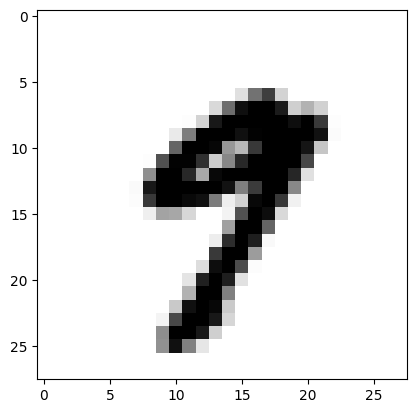

In [12]:
%matplotlib inline
"""CNNを実装する"""
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# 学習データを用意する
(x_train, y_train_o), (x_test, y_test_o) = mnist.load_data()

# データを正規化する
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32')  / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test, (len(x_test), 28, 28, 1))

# y_train_0 : 2, 4, 5, .... -> y_train : [0 0 1 0 0 0 0 0 0 0 0], ......]

y_train = to_categorical(y_train_o)
y_test  = to_categorical(y_test_o)

#print("x_train.shape = ", x_train.shape)
#print("y_train.shape = ", y_train.shape)
#print("y_train[0] = ", y_train[0])
#print("x_test.shape  = ", x_test.shape)

# targetの次元数
target_shape = x_train.shape[1:]
print("target_shape = ", target_shape)

# batch size, epoch
batch_size   = 128
epochs       = 5
nb_classes   = 10
dropout_rate = 0.2

# modelの定義
model   = Sequential(name = "cnn")
input   = Input(shape = target_shape, name = "encoder_1")
conv_1  = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')
pool_1  = tf.keras.layers.MaxPooling2D((2, 2), padding='same')
conv_2  = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')
pool_2  = tf.keras.layers.MaxPooling2D((2, 2), padding='same')
flat    = tf.keras.layers.Flatten()
dense_1 = tf.keras.layers.Dense(64, activation='relu')
#drop    = tf.keras.layers.Dropout(dropout_rate)
dense_2 = tf.keras.layers.Dense(nb_classes, activation='softmax')

model.add(input)
model.add(conv_1)
model.add(pool_1)
model.add(conv_2)
model.add(pool_2)
model.add(flat)
model.add(dense_1)
model.add(dense_2)

# compile
model.compile(optimizer = optimizers.Adam(), loss = losses.categorical_crossentropy, metrics = ['accuracy'])
model.summary()

# 学習
history = model.fit(x_train, y_train, 
                    epochs  = epochs, batch_size = batch_size, 
                    shuffle = True,  validation_data = (x_test, y_test))

ans = model.predict(x_test)
print("ans.shape = ", ans.shape)

error = 0
for i in range(ans.shape[0]) :
    if y_test_o[i] != np.argmax(ans[i]) :
        error += 1

print("real accuracy = ", (ans.shape[0] - error) / ans.shape[0])

n = 20
print("ans[{}] = {}< {} , {} >".format(n, ans[n], np.argmax(ans[n]), ans[n, np.argmax(ans[n])]))
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(x_test[n], cmap=matplotlib.cm.binary, interpolation="nearest")
plt.show()


### predictionの結果について

predictionの構造  

[[画像１の結果]　[画像２の結果] ......... [画像１００００番目の結果]]

各画像の結果は

[クラス１に所属する確率　クラス２に所属する確率　...... クラス１０に所属する確率]

画像が「７」と推定　、　クラス７に所属する確率がxxxxxが画像の結果の中で最大値であればOK